In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-05-21.csv")
df = pd.read_csv("data/inc/data-inc-2024-05-27.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160115 entries, 0 to 160114
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        160115 non-null  int64  
 1   id_mls                    160115 non-null  object 
 2   bathrooms_total           160115 non-null  float64
 3   bedrooms_extra            160115 non-null  float64
 4   bedrooms                  160115 non-null  float64
 5   stories_total             160115 non-null  float64
 6   size_interior             160115 non-null  float64
 7   building_type             160115 non-null  object 
 8   agency_name               160115 non-null  object 
 9   agency_type               160115 non-null  object 
 10  property_type             160115 non-null  object 
 11  lng                       160115 non-null  float64
 12  lat                       160115 non-null  float64
 13  ownership_type            160115 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26946396,24012121,2,3 + 1,1.75,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.307694,Freehold,1,29.99X105,0,https://realtor.ca/real-estate/26946396/448-ra...,638523652583130000,N9B2R7,Ontario,399000.0
1,26943719,X8372116,2,4,2.00,NaN,Duplex,PROPERTY ZILLA,Firm,Single Family,...,42.302844,none,none,30 x 121.5 FT|under 1/2 acre,0,https://realtor.ca/real-estate/26943719/927-92...,638521975610200000,N9B2J4,Ontario,499999.0
2,26943351,24012118,2,5 + 0,1.50,NaN,House,EXP REALTY,Firm,Single Family,...,42.308473,Freehold,1,25X100.75,0,https://realtor.ca/real-estate/26943351/555-br...,638521924616800000,N9B2M3,Ontario,299900.0
3,26943042,24012011,1,2 + 0,2.00,NaN,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.308402,Freehold,1,13.75X100.00,0,https://realtor.ca/real-estate/26943042/1450-w...,638521888730300000,N9B1H4,Ontario,199900.0
4,26943041,24012117,0,0,NaN,NaN,No Building,SUN COUNTY REALTY INC. - 732,Firm,Vacant Land,...,42.286334,Freehold,1,See Remarks,0,https://realtor.ca/real-estate/26943041/574-ch...,638521888709630000,N8X3A3,Ontario,229900.0


In [5]:
df.shape

(23756, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23756 entries, 0 to 23755
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23756 non-null  int64  
 1   id_mls                    23756 non-null  object 
 2   bathrooms_total           23756 non-null  int64  
 3   bedrooms                  23756 non-null  object 
 4   stories_total             15698 non-null  float64
 5   size_interior             12635 non-null  object 
 6   building_type             23756 non-null  object 
 7   agency_name               23756 non-null  object 
 8   agency_type               23756 non-null  object 
 9   property_type             23756 non-null  object 
 10  lng                       23756 non-null  float64
 11  lat                       23756 non-null  float64
 12  ownership_type            23756 non-null  object 
 13  ownership_type_group_ids  23756 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26940747,24012092,1,2 + 0,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0
16,26938800,24012030,3,4 + 0,2.0,2700.0000,House,JUMP REALTY INC.,Firm,Single Family,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938800/162-mc...,638521601177130000,N9V4C9,Ontario,875900.0
18,26938796,24012057,4,6 + 0,2.0,2115.0000,Duplex,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.307737,Freehold,1,32X137.25 FT,0,https://realtor.ca/real-estate/26938796/1402-1...,638521601141600000,N8X4P4,Ontario,499900.0
20,26938794,24012060,3,4 + 0,2.0,2700.0000,House,JUMP REALTY INC.,Firm,Single Family,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938794/164-mc...,638521601135000000,N9V4C9,Ontario,875900.0
22,26938620,40594613,1,2 + 0,1.0,718.0000,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,Single Family,...,42.298301,Condominium,2,0.75 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26938620/3355-s...,638521577970370000,N9C1B2,Ontario,279900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23751,26929765,5817,2,2,NaN,1014 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,...,62.466537,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26929765/300-19...,638520126045700000,NaN,Northwest Territories,415000.0
23752,26926808,5816,1,1,NaN,627 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.453572,Condominium/Strata,2,627,0,https://realtor.ca/real-estate/26926808/505-50...,638519946155000000,NaN,Northwest Territories,295000.0
23753,26924005,5807,2,3,NaN,1361 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.444191,none,none,8446,0,https://realtor.ca/real-estate/26924005/11-pta...,638519343317600000,X1A2W7,Northwest Territories,569900.0
23754,26923589,5815,3,4,NaN,1231 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.451819,none,none,5004,0,https://realtor.ca/real-estate/26923589/5020-5...,638519297670000000,NaN,Northwest Territories,529000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           3574
Ontario                    3393
Alberta                    2603
Quebec                     1515
Saskatchewan                565
Manitoba                    538
New Brunswick               308
Newfoundland & Labrador     115
Yukon                        13
Northwest Territories        11
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    11204
British Columbia            3824
Quebec                      3389
Alberta                     2805
Saskatchewan                 650
Manitoba                     639
Nova Scotia                  531
New Brunswick                414
Newfoundland & Labrador      138
Prince Edward Island         136
Yukon                         15
Northwest Territories         11
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,23756.0,23756.0,15698.0,23756.0,23756.0,23756.0,2.375600e+04,23756.0
mean,26931458.0,2.0,2.0,-90.0,47.0,3.0,6.385205e+17,887831.0
std,8641.0,1.0,3.0,19.0,3.0,4.0,1.280364e+12,949369.0
min,26916280.0,0.0,0.0,-139.0,42.0,0.0,6.385173e+17,1.0
25%,26923971.0,1.0,1.0,-113.0,44.0,0.0,6.385193e+17,427000.0
50%,26931562.0,2.0,2.0,-80.0,45.0,2.0,6.385207e+17,679000.0
75%,26938892.0,3.0,2.0,-78.0,49.0,4.0,6.385216e+17,999900.0
max,26946654.0,41.0,58.0,-53.0,64.0,107.0,6.385239e+17,31000000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

23750

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

12


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
6577,26922055,C8356960,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.664265,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26922055/1506-4...,638519233903530000,M4Y2K2,Ontario,498998.0
6579,26922055,C8356960,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.664265,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26922055/1506-4...,638519233903530000,M4Y2K2,Ontario,498998.0
17130,26923130,R2885055,3,3,NaN,1578 sqft,Duplex,RE/MAX Select Properties,Firm,Single Family,...,49.258614,Strata,2,0,1,https://realtor.ca/real-estate/26923130/874-e-...,638519251664300000,V5T2L5,British Columbia,1798000.0
17131,26923130,R2885055,3,3,NaN,1578 sqft,Duplex,RE/MAX Select Properties,Firm,Single Family,...,49.258614,Strata,2,0,1,https://realtor.ca/real-estate/26923130/874-e-...,638519251664300000,V5T2L5,British Columbia,1798000.0
6177,26923640,C8358410,2,3,NaN,NaN,Apartment,CENTURY 21 KINGDOM REALTY INC.,Firm,Single Family,...,43.711798,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26923640/608-5-...,638519308374500000,M3C1A4,Ontario,479000.0
6179,26923640,C8358410,2,3,NaN,NaN,Apartment,CENTURY 21 KINGDOM REALTY INC.,Firm,Single Family,...,43.711798,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26923640/608-5-...,638519308374500000,M3C1A4,Ontario,479000.0
5178,26929553,X8362264,3,4,2.0,NaN,House,REVEL REALTY INC.,Firm,Single Family,...,43.065904,Freehold,1,41.99 x 92.75 FT ; 92.79 ft x 42.09 ft x94.55 ...,6,https://realtor.ca/real-estate/26929553/8635-c...,638520107741900000,L2H3S4,Ontario,994000.0
5179,26929553,X8362264,3,4,2.0,NaN,House,REVEL REALTY INC.,Firm,Single Family,...,43.065904,Freehold,1,41.99 x 92.75 FT ; 92.79 ft x 42.09 ft x94.55 ...,6,https://realtor.ca/real-estate/26929553/8635-c...,638520107741900000,L2H3S4,Ontario,994000.0
3978,26937338,C8367930,3,3 + 2,1.5,NaN,House,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.782503,Freehold,1,55.94 x 120 FT,7,https://realtor.ca/real-estate/26937338/7-marg...,638521107187730000,M2J4B8,Ontario,1229000.0
3979,26937338,C8367930,3,3 + 2,1.5,NaN,House,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.782503,Freehold,1,55.94 x 120 FT,7,https://realtor.ca/real-estate/26937338/7-marg...,638521107187730000,M2J4B8,Ontario,1229000.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
6579,26922055,C8356960,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.664265,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26922055/1506-4...,638519233903530000,M4Y2K2,Ontario,498998.0
17131,26923130,R2885055,3,3,NaN,1578 sqft,Duplex,RE/MAX Select Properties,Firm,Single Family,...,49.258614,Strata,2,0,1,https://realtor.ca/real-estate/26923130/874-e-...,638519251664300000,V5T2L5,British Columbia,1798000.0
6179,26923640,C8358410,2,3,NaN,NaN,Apartment,CENTURY 21 KINGDOM REALTY INC.,Firm,Single Family,...,43.711798,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26923640/608-5-...,638519308374500000,M3C1A4,Ontario,479000.0
5179,26929553,X8362264,3,4,2.0,NaN,House,REVEL REALTY INC.,Firm,Single Family,...,43.065904,Freehold,1,41.99 x 92.75 FT ; 92.79 ft x 42.09 ft x94.55 ...,6,https://realtor.ca/real-estate/26929553/8635-c...,638520107741900000,L2H3S4,Ontario,994000.0
3979,26937338,C8367930,3,3 + 2,1.5,NaN,House,HOMELIFE NEW WORLD REALTY INC.,Firm,Single Family,...,43.782503,Freehold,1,55.94 x 120 FT,7,https://realtor.ca/real-estate/26937338/7-marg...,638521107187730000,M2J4B8,Ontario,1229000.0
8175,26940384,S8369854,2,3 + 0,2.0,NaN,Row / Townhouse,CENTURY 21 B.J. ROTH REALTY LTD.,Firm,Single Family,...,44.335895,Freehold,1,13.72 x 33.53 FT,3,https://realtor.ca/real-estate/26940384/31-hui...,638521688696570000,L4N9P9,Ontario,624900.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(23744, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23744 entries, 0 to 23755
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23744 non-null  int64  
 1   id_mls                    23744 non-null  object 
 2   bathrooms_total           23744 non-null  int64  
 3   bedrooms                  23744 non-null  object 
 4   stories_total             15692 non-null  float64
 5   size_interior             12633 non-null  object 
 6   building_type             23744 non-null  object 
 7   agency_name               23744 non-null  object 
 8   agency_type               23744 non-null  object 
 9   property_type             23744 non-null  object 
 10  lng                       23744 non-null  float64
 11  lat                       23744 non-null  float64
 12  ownership_type            23744 non-null  object 
 13  ownership_type_group_ids  23744 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  13721
none                       3791
Condominium/Strata         3645
Strata                     1723
Condominium                 502
Leasehold                   166
Freehold Condo               65
Leasehold Condo/Strata       41
Undivided Co-ownership       33
Unknown                      15
Shares in Co-operative       14
Other, See Remarks           11
Timeshare/Fractional          8
Leasehold/Leased Land         6
Cooperative                   2
Life Lease                    1
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                         13607
Apartment                      4154
Row / Townhouse                2386
none                           1789
Duplex                          638
Mobile Home                     201
No Building                     176
Triplex                         165
Multi-Family                    121
Manufactured Home               108
Fourplex                         99
Unknown                          90
Other                            79
Recreational                     77
Manufactured Home/Mobile         23
Modular                          15
Parking                           7
Two Apartment House               5
Residential Commercial Mix        2
Commercial Mix                    2
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  45
none                      24
Strata                     4
Condominium/Strata         3
Shares in Co-operative     2
Freehold Condo             1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    21495
Vacant Land       1667
Multi-family       371
Agriculture        116
Recreational        89
Parking              6
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21495 entries, 0 to 23755
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21495 non-null  int64  
 1   id_mls                    21495 non-null  object 
 2   bathrooms_total           21495 non-null  int64  
 3   bedrooms                  21495 non-null  object 
 4   stories_total             15326 non-null  float64
 5   size_interior             12292 non-null  object 
 6   building_type             21495 non-null  object 
 7   agency_name               21495 non-null  object 
 8   agency_type               21495 non-null  object 
 9   property_type             21495 non-null  object 
 10  lng                       21495 non-null  float64
 11  lat                       21495 non-null  float64
 12  ownership_type            21495 non-null  object 
 13  ownership_type_group_ids  21495 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    10425
British Columbia            3529
Quebec                      3007
Alberta                     2572
Saskatchewan                 561
Manitoba                     535
Nova Scotia                  379
New Brunswick                295
Newfoundland & Labrador      102
Prince Edward Island          68
Yukon                         11
Northwest Territories         11
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       13592
Apartment                    4146
Row / Townhouse              2385
Duplex                        529
none                          254
Mobile Home                   201
Triplex                       125
Manufactured Home             105
Fourplex                       69
Recreational                   35
Manufactured Home/Mobile       23
Modular                        15
Other                           9
Two Apartment House             5
Multi-Family                    1
Parking                         1
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12522
Condominium/Strata         3626
none                       2792
Strata                     1708
Condominium                 502
Leasehold                   160
Freehold Condo               65
Leasehold Condo/Strata       41
Undivided Co-ownership       33
Unknown                      11
Shares in Co-operative       10
Other, See Remarks            9
Timeshare/Fractional          7
Leasehold/Leased Land         6
Cooperative                   2
Life Lease                    1
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,26943719,X8372116,2,4,2.0,NaN,Duplex,PROPERTY ZILLA,Firm,Single Family,...,42.302844,none,none,30 x 121.5 FT|under 1/2 acre,0,https://realtor.ca/real-estate/26943719/927-92...,638521975610200000,N9B2J4,Ontario,499999.0
55,26931544,24011931,2,2 + 0,NaN,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.239203,none,none,34X114,0,https://realtor.ca/real-estate/26931544/lot-36...,638520664542670000,N9J1G2,Ontario,649900.0
63,26928720,X8362010,2,2,2.0,NaN,Duplex,TEAM GLASSER REAL ESTATE BROKERAGE INC.,Firm,Single Family,...,42.321246,none,none,40.75 x 32 FT,0,https://realtor.ca/real-estate/26928720/2645-w...,638520036287600000,N8Y1V7,Ontario,439000.0
72,26926767,24011868,0,0 + 0,NaN,NaN,none,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321533,none,none,30X97,0,https://realtor.ca/real-estate/26926767/vl-cha...,638519944693170000,N9A2X6,Ontario,139900.0
121,26918556,24011632,2,2 + 0,NaN,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.239203,none,none,34X114,0,https://realtor.ca/real-estate/26918556/lot-38...,638518936664670000,N9J1G2,Ontario,649900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23749,26935482,5820,6,7,NaN,2190 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.457768,none,none,5010,0,https://realtor.ca/real-estate/26935482/4909-4...,638520909622870000,NaN,Northwest Territories,869000.0
23750,26934302,5819,2,3,NaN,2224 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.464690,none,none,10350,0,https://realtor.ca/real-estate/26934302/9-ball...,638520837768330000,NaN,Northwest Territories,740000.0
23753,26924005,5807,2,3,NaN,1361 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.444191,none,none,8446,0,https://realtor.ca/real-estate/26924005/11-pta...,638519343317600000,X1A2W7,Northwest Territories,569900.0
23754,26923589,5815,3,4,NaN,1231 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.451819,none,none,5004,0,https://realtor.ca/real-estate/26923589/5020-5...,638519297670000000,NaN,Northwest Territories,529000.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

1        https://realtor.ca/real-estate/26943719/927-92...
55       https://realtor.ca/real-estate/26931544/lot-36...
63       https://realtor.ca/real-estate/26928720/2645-w...
72       https://realtor.ca/real-estate/26926767/vl-cha...
121      https://realtor.ca/real-estate/26918556/lot-38...
                               ...                        
23749    https://realtor.ca/real-estate/26935482/4909-4...
23750    https://realtor.ca/real-estate/26934302/9-ball...
23753    https://realtor.ca/real-estate/26924005/11-pta...
23754    https://realtor.ca/real-estate/26923589/5020-5...
23755    https://realtor.ca/real-estate/26927602/634-6t...
Name: page_url, Length: 2792, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

417      https://realtor.ca/real-estate/26918158/5600-b...
1272     https://realtor.ca/real-estate/26935681/52-che...
1664     https://realtor.ca/real-estate/26939670/107-pa...
1898     https://realtor.ca/real-estate/26933686/40-hil...
1901     https://realtor.ca/real-estate/26933628/9-spru...
5900     https://realtor.ca/real-estate/26925636/1501-l...
7635     https://realtor.ca/real-estate/26941888/28-che...
7713     https://realtor.ca/real-estate/26944883/3-murr...
8152     https://realtor.ca/real-estate/26941372/60-pen...
8211     https://realtor.ca/real-estate/26939688/5216-c...
8500     https://realtor.ca/real-estate/26931463/1-elm-...
8908     https://realtor.ca/real-estate/26918499/8-nett...
10151    https://realtor.ca/real-estate/26941165/255-pe...
10573    https://realtor.ca/real-estate/26943060/9-pana...
22180    https://realtor.ca/real-estate/26944408/513-ac...
Name: page_url, dtype: object

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,,
Alberta,463,198,5,1534,43,0,26,0,0,0,1,6,293,1,0,2
British Columbia,1091,120,5,1636,58,23,16,0,0,0,0,11,560,1,0,8
Manitoba,40,9,0,453,0,0,9,0,0,1,0,0,23,0,0,0
New Brunswick,2,0,0,279,0,0,6,0,0,0,0,0,2,0,0,6
Newfoundland & Labrador,0,0,0,91,0,0,4,0,1,0,0,0,0,0,5,1
Northwest Territories,4,0,0,5,2,0,0,0,0,0,0,0,0,0,0,0
Nova Scotia,20,8,0,306,0,0,13,0,0,0,0,18,14,0,0,0
Ontario,1758,51,6,6903,0,0,67,14,0,8,0,0,1404,14,0,200
Prince Edward Island,5,3,0,54,0,0,0,0,0,0,0,0,4,0,0,2


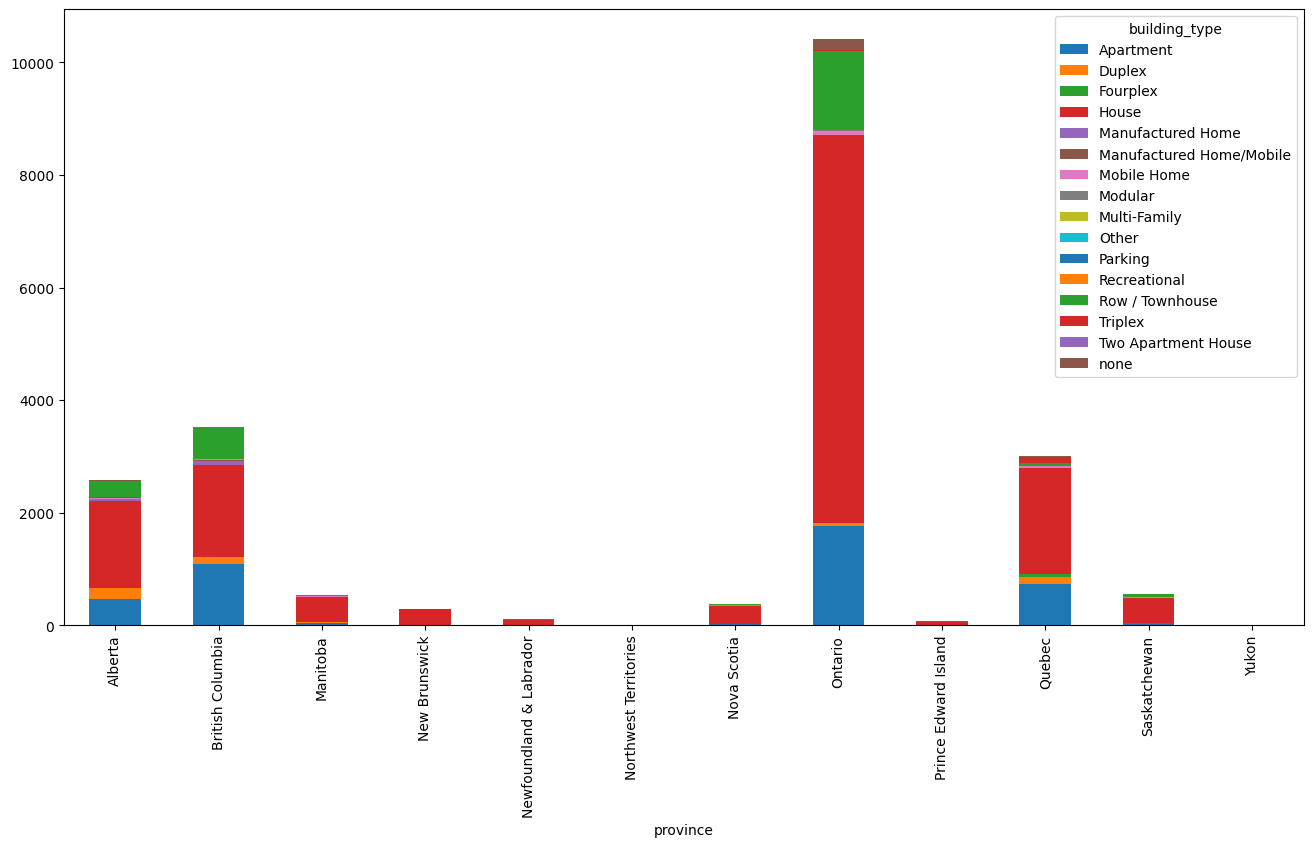

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

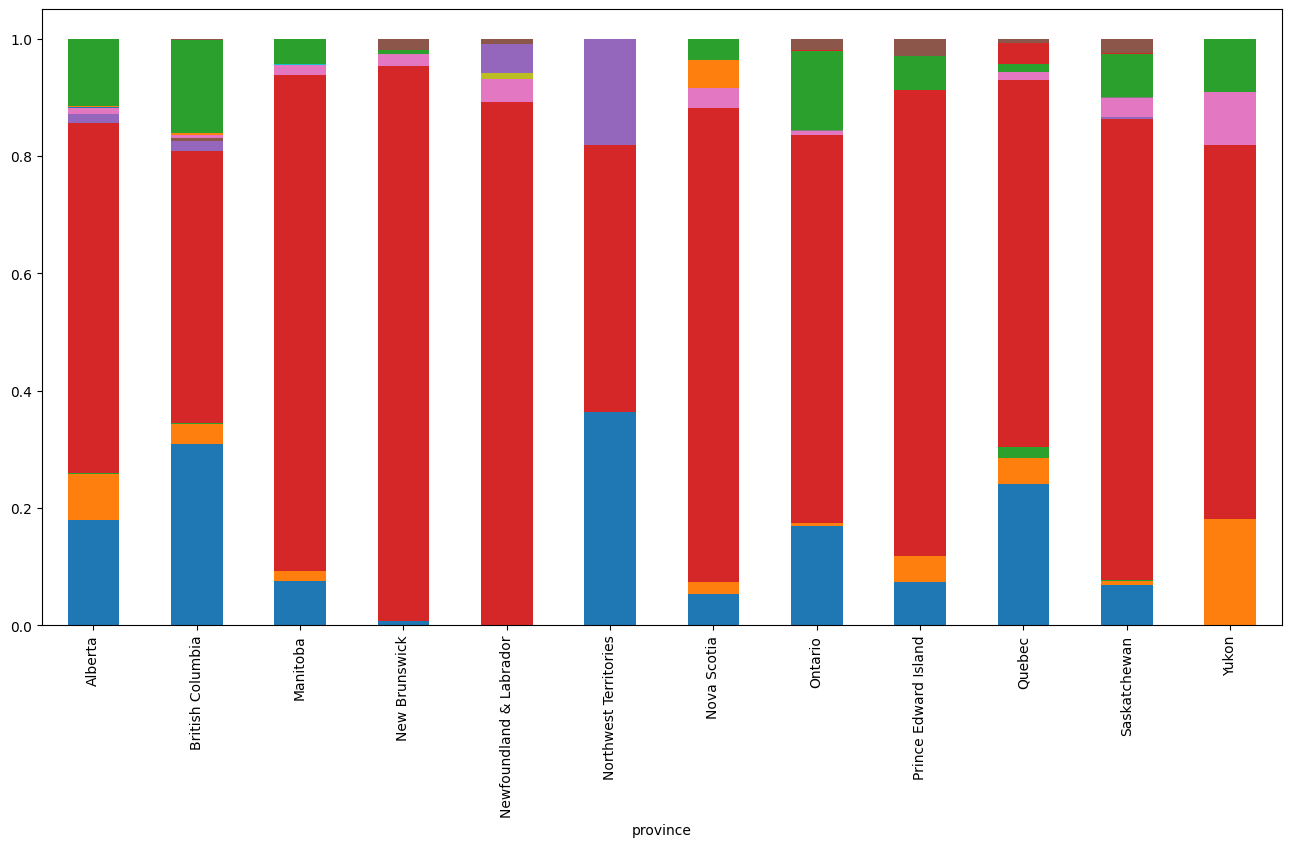

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,769,0,1681,0,13,0,0,0,0,0,0,0,0,0,109
British Columbia,0,42,0,1630,0,55,38,6,0,6,4,1708,2,0,5,33
Manitoba,0,0,0,458,65,9,0,0,0,0,0,0,0,0,3,0
New Brunswick,0,10,0,205,0,3,0,0,0,0,0,0,0,0,2,75
Newfoundland & Labrador,1,0,0,98,0,1,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,7
Nova Scotia,0,25,0,347,0,4,0,0,0,0,0,0,2,0,1,0
Ontario,501,1936,2,7577,0,59,3,0,1,3,6,0,3,0,0,334
Prince Edward Island,0,10,0,58,0,0,0,0,0,0,0,0,0,0,0,0


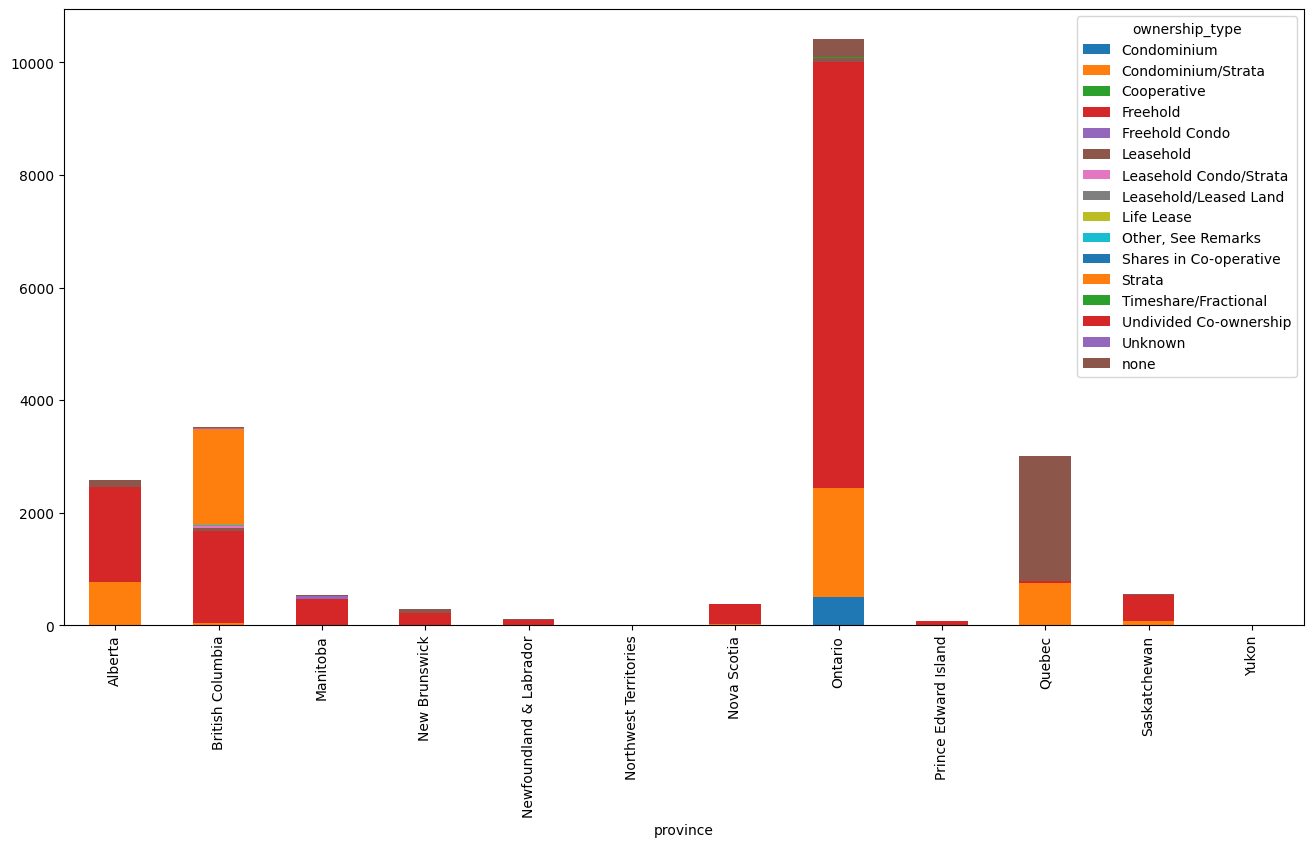

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

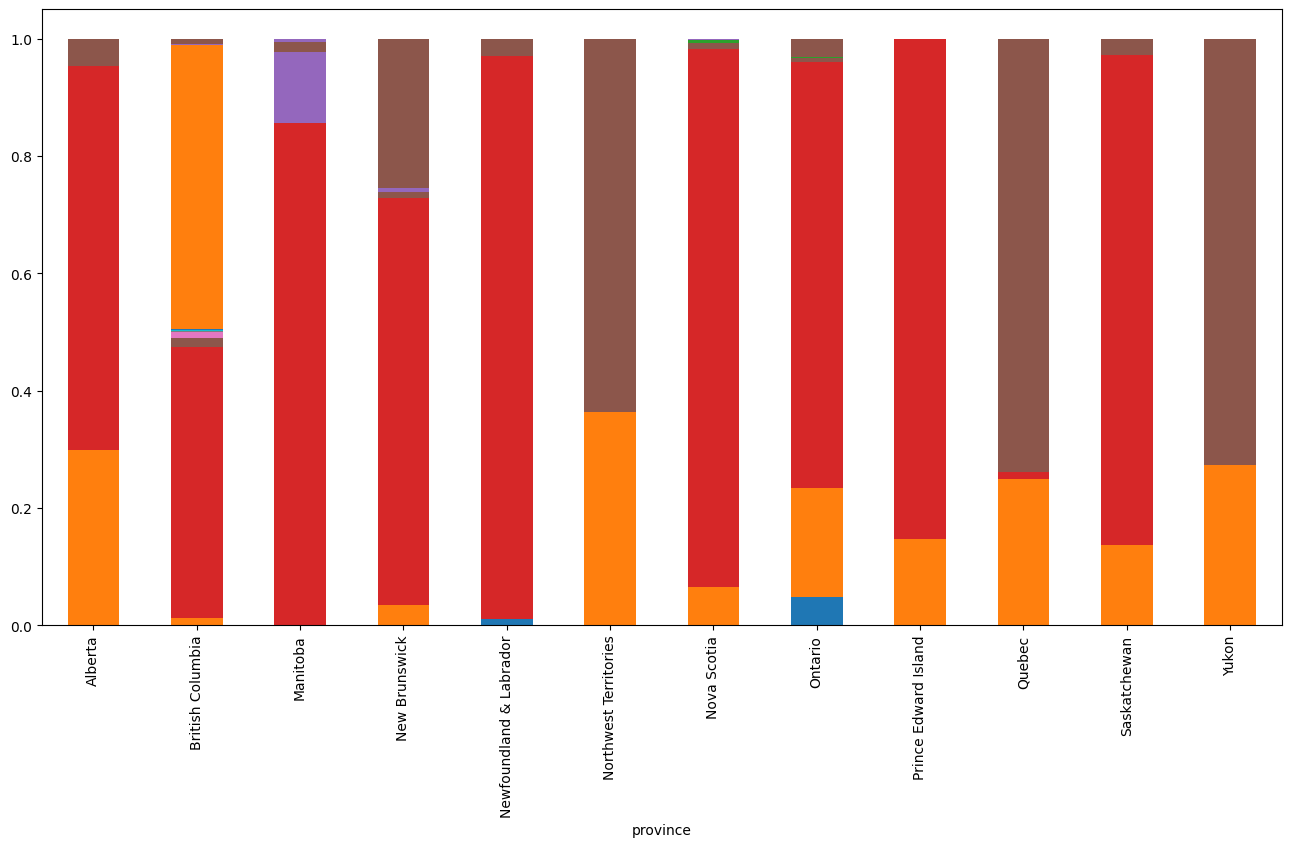

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2690
Strata                    1018
Condominium                298
Freehold Condo              39
Undivided Co-ownership      31
Leasehold Condo/Strata      30
Freehold                    18
Shares in Co-operative       8
none                         4
Timeshare/Fractional         4
Leasehold                    4
Life Lease                   1
Unknown                      1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold              227
none                  179
Strata                 77
Condominium/Strata     44
Leasehold               2
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,,
Condominium,298,0,0,13,0,0,0,0,0,0,0,0,182,0,0,9
Condominium/Strata,2690,44,2,68,1,0,0,0,0,3,1,1,792,0,0,24
Cooperative,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
Freehold,18,227,9,11220,54,16,38,3,1,0,0,21,854,2,5,54
Freehold Condo,39,0,0,8,0,0,0,0,0,1,0,0,17,0,0,0
Leasehold,4,2,0,52,20,4,57,12,0,0,0,1,6,0,0,2
Leasehold Condo/Strata,30,0,0,0,1,0,0,0,0,0,0,0,10,0,0,0
Leasehold/Leased Land,0,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0
Life Lease,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


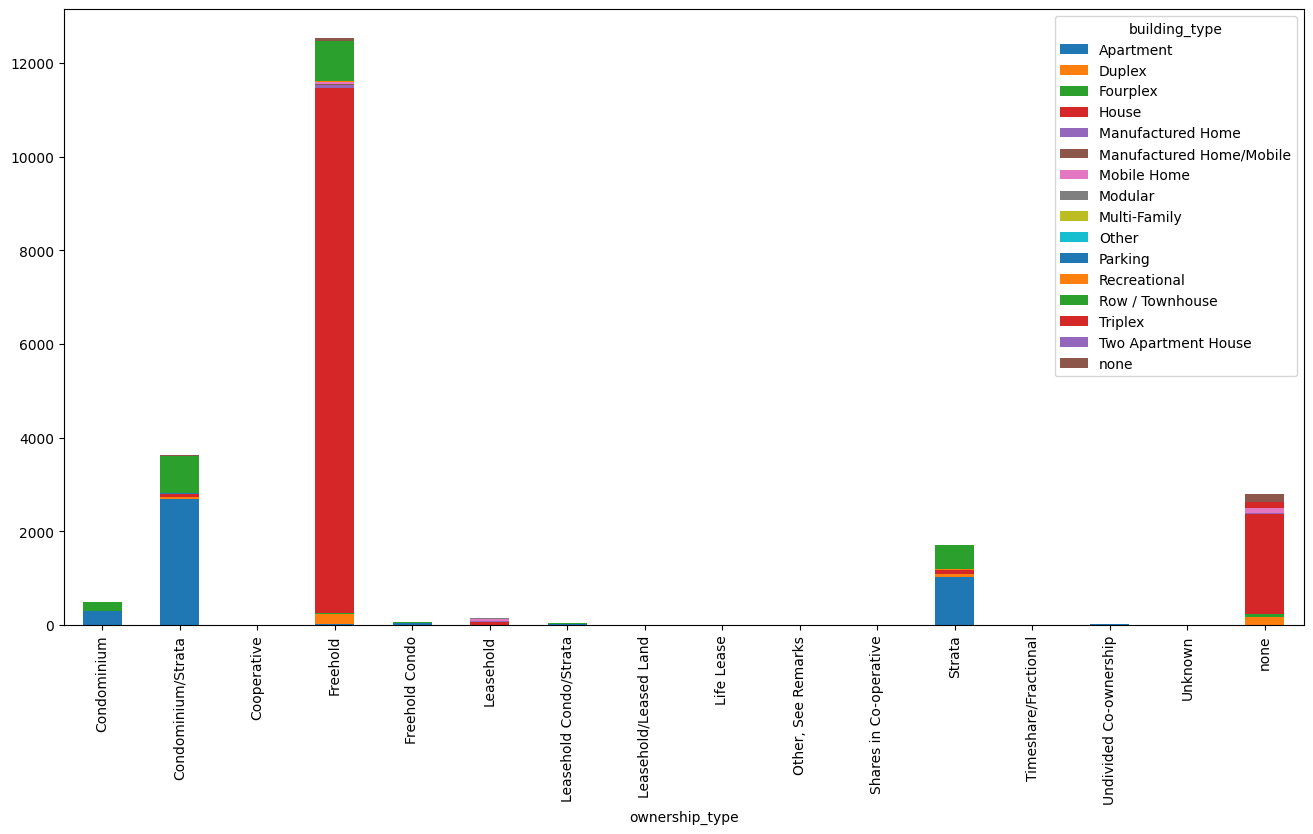

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

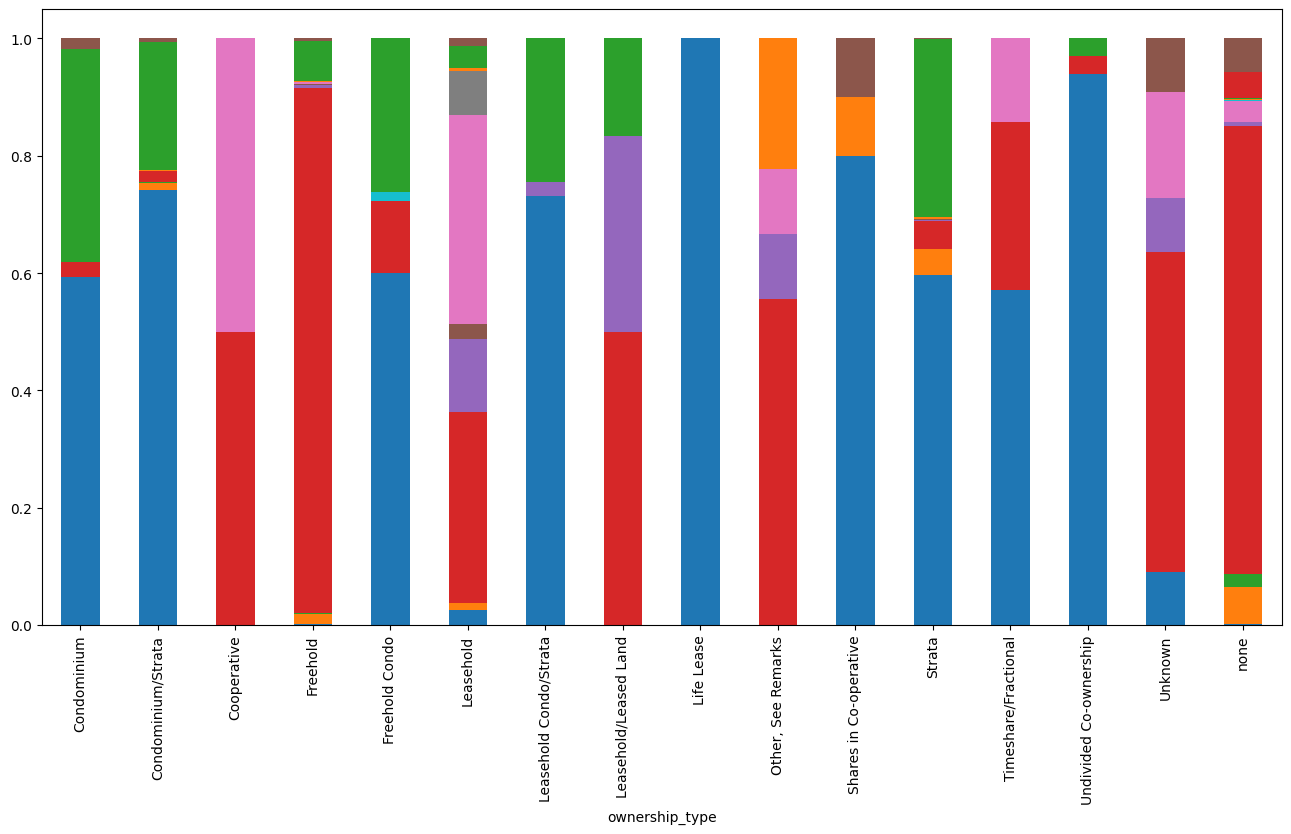

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,529.0,529.0,343.0,529.0,529.0,529.0,5.290000e+02,529.0
mean,26932385.0,3.0,2.0,-101.0,49.0,2.0,6.385206e+17,775711.0
std,8603.0,1.0,0.0,21.0,4.0,2.0,1.282719e+12,540430.0
min,26916448.0,0.0,1.0,-135.0,42.0,0.0,6.385174e+17,120000.0
25%,26925558.0,2.0,2.0,-114.0,46.0,0.0,6.385199e+17,419900.0
50%,26933176.0,3.0,2.0,-114.0,49.0,2.0,6.385208e+17,609900.0
75%,26939716.0,3.0,2.0,-74.0,51.0,3.0,6.385217e+17,899000.0
max,26946519.0,6.0,3.0,-63.0,61.0,13.0,6.385238e+17,3850000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,125.0,125.0,67.0,125.0,125.0,125.0,1.250000e+02,125.0
mean,26931643.0,1.0,2.0,-75.0,46.0,3.0,6.385205e+17,783669.0
std,9126.0,1.0,0.0,7.0,1.0,3.0,1.447000e+12,308198.0
min,26916435.0,1.0,1.0,-119.0,42.0,0.0,6.385173e+17,169900.0
25%,26923468.0,1.0,2.0,-74.0,45.0,0.0,6.385193e+17,599900.0
50%,26932316.0,1.0,2.0,-74.0,46.0,2.0,6.385207e+17,765000.0
75%,26938898.0,1.0,2.0,-73.0,46.0,4.0,6.385216e+17,935000.0
max,26946514.0,4.0,3.0,-70.0,54.0,12.0,6.385238e+17,2150000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,69.0,69.0,39.0,69.0,69.0,69.0,6.900000e+01,69.0
mean,26932307.0,2.0,2.0,-80.0,47.0,4.0,6.385206e+17,868922.0
std,8770.0,2.0,1.0,16.0,2.0,3.0,1.319032e+12,417285.0
min,26916429.0,1.0,1.0,-123.0,43.0,0.0,6.385173e+17,199000.0
25%,26925800.0,1.0,2.0,-78.0,46.0,0.0,6.385199e+17,575000.0
50%,26932281.0,1.0,2.0,-74.0,46.0,3.0,6.385207e+17,880000.0
75%,26940038.0,2.0,3.0,-73.0,47.0,6.0,6.385217e+17,1049000.0
max,26946431.0,10.0,3.0,-65.0,54.0,12.0,6.385237e+17,2499999.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2385.0,2385.0,1712.0,2385.0,2385.0,2385.0,2.385000e+03,2385.0
mean,26931745.0,3.0,2.0,-94.0,46.0,2.0,6.385205e+17,773425.0
std,8412.0,1.0,1.0,20.0,3.0,1.0,1.236905e+12,373656.0
min,26916337.0,0.0,1.0,-135.0,42.0,0.0,6.385173e+17,2300.0
25%,26924357.0,2.0,2.0,-114.0,44.0,1.0,6.385194e+17,549900.0
50%,26931918.0,3.0,2.0,-80.0,44.0,2.0,6.385207e+17,719900.0
75%,26938876.0,3.0,3.0,-79.0,49.0,2.0,6.385216e+17,924900.0
max,26946650.0,6.0,4.0,-63.0,61.0,24.0,6.385238e+17,4249000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       13592
Apartment                    4146
Row / Townhouse              2385
Semi-Detached                 723
none                          254
Mobile Home                   201
Manufactured Home             105
Recreational                   35
Manufactured Home/Mobile       23
Modular                        15
Other                           9
Two Apartment House             5
Multi-Family                    1
Parking                         1
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              13592
Apartment           4146
Row / Townhouse     2385
Semi-Detached        723
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20846 entries, 0 to 23755
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20846 non-null  int64  
 1   id_mls                    20846 non-null  object 
 2   bathrooms_total           20846 non-null  int64  
 3   bedrooms                  20846 non-null  object 
 4   stories_total             14921 non-null  float64
 5   size_interior             11836 non-null  object 
 6   building_type             20846 non-null  object 
 7   agency_name               20846 non-null  object 
 8   agency_type               20846 non-null  object 
 9   property_type             20846 non-null  object 
 10  lng                       20846 non-null  float64
 11  lat                       20846 non-null  float64
 12  ownership_type            20846 non-null  object 
 13  ownership_type_group_ids  20846 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    10136
British Columbia            3413
Quebec                      2945
Alberta                     2494
Saskatchewan                 526
Manitoba                     525
Nova Scotia                  348
New Brunswick                283
Newfoundland & Labrador       91
Prince Edward Island          66
Yukon                         10
Northwest Territories          9
Name: count, dtype: int64

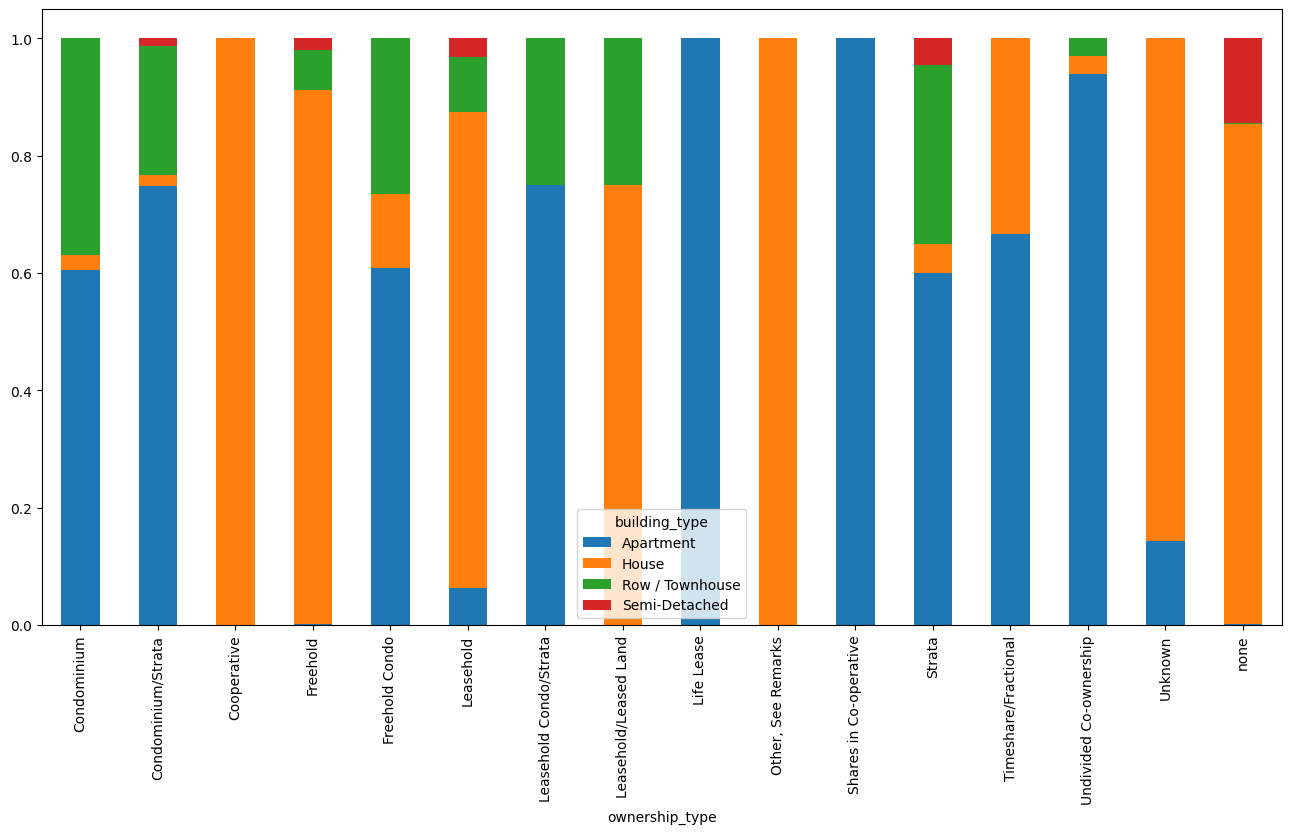

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12330
2           5895
none        2506
4             68
1 2           33
1 2 3 4        7
3              6
2 3            1
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11220
none        2138
2            170
4             55
1 2 3 4        6
3              2
1 2            1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4083
1 2          31
1            18
none          4
3             4
4             4
2 3           1
1 2 3 4       1
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    360
1       238
2       123
4         2
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1519
1        854
4          7
none       4
1 2        1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12330.0,12330.0,10007.0,12330.0,12330.0,12330.0,1.233000e+04,12330.0
mean,26931382.0,3.0,2.0,-90.0,46.0,3.0,6.385205e+17,1073779.0
std,8489.0,1.0,1.0,18.0,4.0,4.0,1.239321e+12,956628.0
min,26916280.0,0.0,1.0,-132.0,42.0,0.0,6.385173e+17,1.0
25%,26924056.0,2.0,1.0,-112.0,44.0,0.0,6.385194e+17,559900.0
50%,26931685.0,3.0,2.0,-80.0,44.0,3.0,6.385207e+17,824900.0
75%,26938690.0,4.0,2.0,-79.0,49.0,5.0,6.385216e+17,1297000.0
max,26946654.0,14.0,5.0,-53.0,59.0,103.0,6.385239e+17,16800000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2506.0,2506.0,2258.0,2506.0,2506.0,2506.0,2.506000e+03,2506.0
mean,26932002.0,2.0,2.0,-75.0,46.0,4.0,6.385206e+17,673025.0
std,9273.0,1.0,1.0,9.0,2.0,5.0,1.455722e+12,510483.0
min,26916288.0,0.0,1.0,-139.0,42.0,0.0,6.385173e+17,1.0
25%,26924167.0,1.0,1.0,-74.0,45.0,2.0,6.385194e+17,385000.0
50%,26932324.0,2.0,2.0,-74.0,46.0,4.0,6.385207e+17,569000.0
75%,26940068.0,2.0,2.0,-73.0,46.0,6.0,6.385217e+17,799000.0
max,26946612.0,9.0,3.0,-53.0,64.0,101.0,6.385238e+17,5980000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,6.0,6.0,4.0,6.0,6.0,6.0,6.000000e+00,6.0
mean,26932704.0,2.0,2.0,-88.0,46.0,0.0,6.385208e+17,321600.0
std,10204.0,1.0,1.0,28.0,2.0,0.0,1.409203e+12,411297.0
min,26919837.0,1.0,1.0,-124.0,45.0,0.0,6.385190e+17,45000.0
25%,26924061.0,2.0,1.0,-112.0,45.0,0.0,6.385195e+17,58675.0
50%,26936398.0,2.0,2.0,-78.0,45.0,0.0,6.385212e+17,74950.0
75%,26938420.0,4.0,2.0,-67.0,48.0,0.0,6.385216e+17,544900.0
max,26944548.0,4.0,2.0,-64.0,49.0,1.0,6.385225e+17,979900.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,68.0,68.0,44.0,68.0,68.0,68.0,6.800000e+01,68.0
mean,26933318.0,2.0,1.0,-101.0,48.0,1.0,6.385208e+17,651552.0
std,9208.0,1.0,0.0,20.0,3.0,2.0,1.311706e+12,639278.0
min,26917701.0,0.0,1.0,-125.0,42.0,0.0,6.385183e+17,2300.0
25%,26924634.0,1.0,1.0,-121.0,45.0,0.0,6.385195e+17,249900.0
50%,26935586.0,2.0,1.0,-105.0,49.0,0.0,6.385209e+17,484000.0
75%,26941374.0,3.0,1.0,-81.0,50.0,2.0,6.385218e+17,732500.0
max,26946434.0,5.0,2.0,-53.0,56.0,11.0,6.385237e+17,3850000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,5.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,26928592.0,1.0,10.0,-103.0,49.0,0.0,6.385201e+17,837329.0
std,7056.0,0.0,20.0,20.0,2.0,0.0,9.109616e+11,1292455.0
min,26923291.0,1.0,1.0,-123.0,44.0,0.0,6.385193e+17,27900.0
25%,26924818.0,1.0,1.0,-120.0,49.0,0.0,6.385196e+17,198400.0
50%,26925459.0,1.0,1.0,-101.0,50.0,0.0,6.385198e+17,259900.0
75%,26929492.0,2.0,2.0,-97.0,50.0,0.0,6.385203e+17,738350.0
max,26942775.0,2.0,47.0,-66.0,51.0,1.0,6.385219e+17,3700000.0


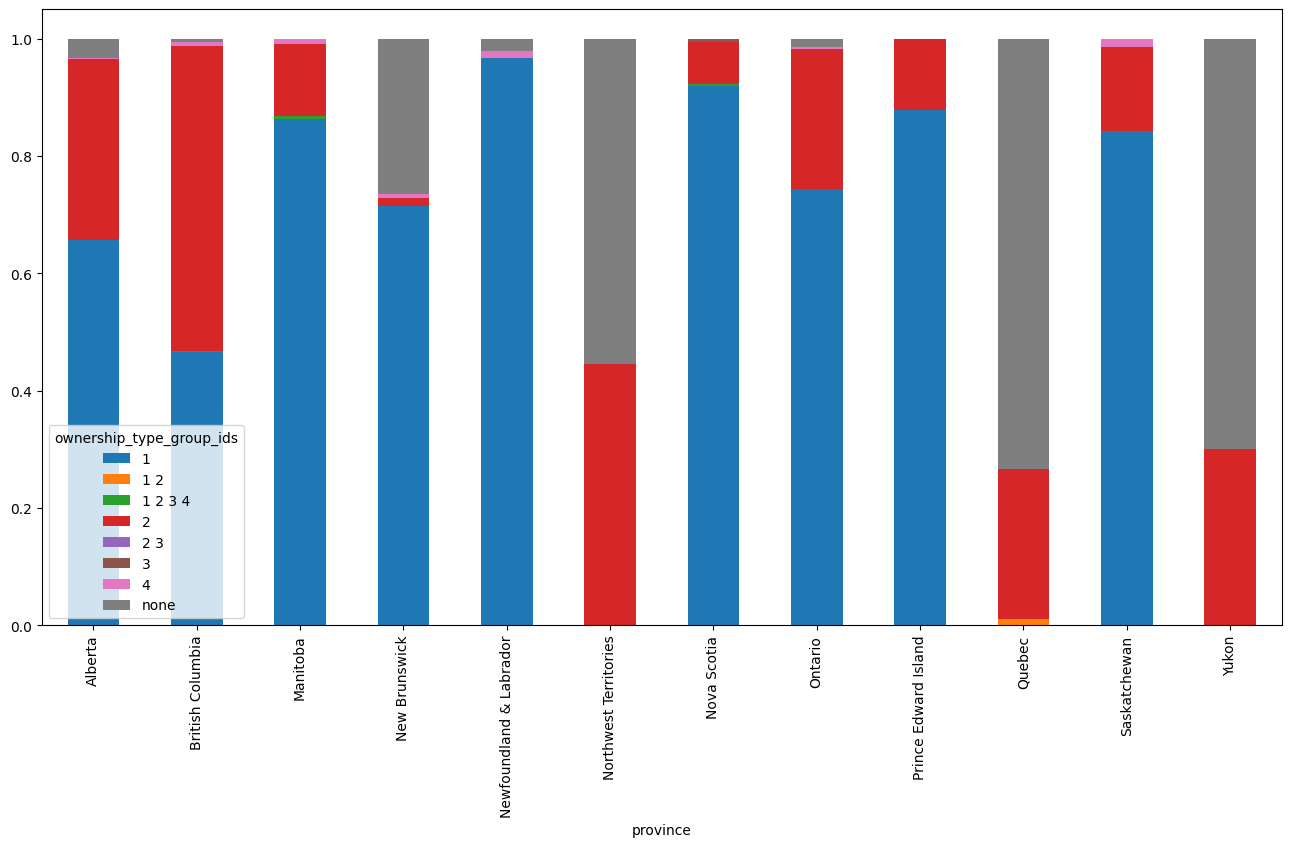

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12330
2           5895
none        2506
4             68
1 2           33
1 2 3 4        7
3              6
2 3            1
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_6247/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    12330
2     5895
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18225 entries, 0 to 23752
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18225 non-null  int64  
 1   id_mls                    18225 non-null  object 
 2   bathrooms_total           18225 non-null  int64  
 3   bedrooms                  18225 non-null  object 
 4   stories_total             12582 non-null  float64
 5   size_interior             10786 non-null  object 
 6   building_type             18225 non-null  object 
 7   agency_name               18225 non-null  object 
 8   agency_type               18225 non-null  object 
 9   property_type             18225 non-null  object 
 10  lng                       18225 non-null  float64
 11  lat                       18225 non-null  float64
 12  ownership_type            18225 non-null  object 
 13  ownership_type_group_ids  18225 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    9957
British Columbia           3366
Alberta                    2405
Quebec                      750
Saskatchewan                518
Manitoba                    517
Nova Scotia                 345
New Brunswick               206
Newfoundland & Labrador      88
Prince Edward Island         66
Northwest Territories         4
Yukon                         3
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6247/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    9882
True     8343
Name: count, dtype: int64

In [73]:
df.shape

(18225, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6247/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26946396,24012121,2,3 + 1,1.75,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.307694,Freehold,1,29.99X105,0,https://realtor.ca/real-estate/26946396/448-ra...,638523652583130000,N9B2R7,Ontario,399000.0
2,26943351,24012118,2,5 + 0,1.50,NaN,House,EXP REALTY,Firm,Single Family,...,42.308473,Freehold,1,25X100.75,0,https://realtor.ca/real-estate/26943351/555-br...,638521924616800000,N9B2M3,Ontario,299900.0
3,26943042,24012011,1,2 + 0,2.00,NaN,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.308402,Freehold,1,13.75X100.00,0,https://realtor.ca/real-estate/26943042/1450-w...,638521888730300000,N9B1H4,Ontario,199900.0
5,26942728,24012116,2,4 + 0,2.00,NaN,House,PROPERTY ZILLA,Firm,Single Family,...,42.302825,Freehold,1,30X121.50,0,https://realtor.ca/real-estate/26942728/927-92...,638521852840500000,N9B2J4,Ontario,499999.0
8,26941135,24012095,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,Single Family,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6247/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    3713
1    3179
2    1205
3     209
4      33
5       3
6       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

18225

In [80]:
bedrooms_extra[:20]

['1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26946396,24012121,1,2,3 + 1,1.75,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.307694,Freehold,1,29.99X105,0,https://realtor.ca/real-estate/26946396/448-ra...,638523652583130000,N9B2R7,Ontario,399000.0
2,26943351,24012118,0,2,5 + 0,1.50,NaN,House,EXP REALTY,Firm,...,42.308473,Freehold,1,25X100.75,0,https://realtor.ca/real-estate/26943351/555-br...,638521924616800000,N9B2M3,Ontario,299900.0
3,26943042,24012011,0,1,2 + 0,2.00,NaN,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,...,42.308402,Freehold,1,13.75X100.00,0,https://realtor.ca/real-estate/26943042/1450-w...,638521888730300000,N9B1H4,Ontario,199900.0
5,26942728,24012116,0,2,4 + 0,2.00,NaN,House,PROPERTY ZILLA,Firm,...,42.302825,Freehold,1,30X121.50,0,https://realtor.ca/real-estate/26942728/927-92...,638521852840500000,N9B2J4,Ontario,499999.0
8,26941135,24012095,0,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0
9,26941134,24012096,0,2,3 + 0,1.75,NaN,House,EXP REALTY,Firm,...,42.309483,Freehold,1,30X114,0,https://realtor.ca/real-estate/26941134/1218-e...,638521744818070000,N8X4G5,Ontario,399888.0
10,26941132,24012099,1,2,3 + 1,NaN,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.229699,Freehold,1,71.39XIRREG,0,https://realtor.ca/real-estate/26941132/200-gi...,638521744805470000,N9J3S4,Ontario,729900.0
11,26940750,24012088,2,3,2 + 2,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.287791,Freehold,1,50X110,0,https://realtor.ca/real-estate/26940750/1835-d...,638521708547900000,N9B3H8,Ontario,935000.0
12,26940748,24012091,1,2,2 + 1,NaN,NaN,House,KEY SOLUTIONS REALTY LTD. - 390,Firm,...,42.247349,Freehold,1,41.67X77.50,0,https://realtor.ca/real-estate/26940748/149-ri...,638521708539670000,N9J3N8,Ontario,499900.0
13,26940747,24012092,0,1,2 + 0,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6247/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18225 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18225 non-null  int64  
 1   id_mls                    18225 non-null  object 
 2   bedrooms_extra            18225 non-null  object 
 3   bathrooms_total           18225 non-null  int64  
 4   bedrooms                  18225 non-null  object 
 5   stories_total             12582 non-null  float64
 6   size_interior             10786 non-null  object 
 7   building_type             18225 non-null  object 
 8   agency_name               18225 non-null  object 
 9   agency_type               18225 non-null  object 
 10  property_type             18225 non-null  object 
 11  lng                       18225 non-null  float64
 12  lat                       18225 non-null  float64
 13  ownership_type            18225 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6247/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26946396,24012121,1,2,3,1.75,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.307694,Freehold,1,29.99X105,0,https://realtor.ca/real-estate/26946396/448-ra...,638523652583130000,N9B2R7,Ontario,399000.0
2,26943351,24012118,0,2,5,1.50,NaN,House,EXP REALTY,Firm,...,42.308473,Freehold,1,25X100.75,0,https://realtor.ca/real-estate/26943351/555-br...,638521924616800000,N9B2M3,Ontario,299900.0
3,26943042,24012011,0,1,2,2.00,NaN,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,...,42.308402,Freehold,1,13.75X100.00,0,https://realtor.ca/real-estate/26943042/1450-w...,638521888730300000,N9B1H4,Ontario,199900.0
5,26942728,24012116,0,2,4,2.00,NaN,House,PROPERTY ZILLA,Firm,...,42.302825,Freehold,1,30X121.50,0,https://realtor.ca/real-estate/26942728/927-92...,638521852840500000,N9B2J4,Ontario,499999.0
8,26941135,24012095,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0
9,26941134,24012096,0,2,3,1.75,NaN,House,EXP REALTY,Firm,...,42.309483,Freehold,1,30X114,0,https://realtor.ca/real-estate/26941134/1218-e...,638521744818070000,N8X4G5,Ontario,399888.0
10,26941132,24012099,1,2,3,NaN,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.229699,Freehold,1,71.39XIRREG,0,https://realtor.ca/real-estate/26941132/200-gi...,638521744805470000,N9J3S4,Ontario,729900.0
11,26940750,24012088,2,3,2,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.287791,Freehold,1,50X110,0,https://realtor.ca/real-estate/26940750/1835-d...,638521708547900000,N9B3H8,Ontario,935000.0
12,26940748,24012091,1,2,2,NaN,NaN,House,KEY SOLUTIONS REALTY LTD. - 390,Firm,...,42.247349,Freehold,1,41.67X77.50,0,https://realtor.ca/real-estate/26940748/149-ri...,638521708539670000,N9J3N8,Ontario,499900.0
13,26940747,24012092,0,1,2,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18225 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18225 non-null  int64  
 1   id_mls                    18225 non-null  object 
 2   bedrooms_extra            18225 non-null  int64  
 3   bathrooms_total           18225 non-null  int64  
 4   bedrooms                  18225 non-null  int64  
 5   stories_total             12582 non-null  float64
 6   size_interior             10786 non-null  object 
 7   building_type             18225 non-null  object 
 8   agency_name               18225 non-null  object 
 9   agency_type               18225 non-null  object 
 10  property_type             18225 non-null  object 
 11  lng                       18225 non-null  float64
 12  lat                       18225 non-null  float64
 13  ownership_type            18225 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    9957
British Columbia           3366
Alberta                    2405
Quebec                      750
Saskatchewan                518
Manitoba                    517
Nova Scotia                 345
New Brunswick               206
Newfoundland & Labrador      88
Prince Edward Island         66
Northwest Territories         4
Yukon                         3
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18225 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18225 non-null  int64  
 1   id_mls                    18225 non-null  object 
 2   bedrooms_extra            18225 non-null  int64  
 3   bathrooms_total           18225 non-null  int64  
 4   bedrooms                  18225 non-null  int64  
 5   stories_total             12582 non-null  float64
 6   size_interior             10786 non-null  object 
 7   building_type             18225 non-null  object 
 8   agency_name               18225 non-null  object 
 9   agency_type               18225 non-null  object 
 10  property_type             18225 non-null  object 
 11  lng                       18225 non-null  float64
 12  lat                       18225 non-null  float64
 13  ownership_type            18225 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26946396,24012121,1,2,3,1.75,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.307694,Freehold,1,29.99X105,0,https://realtor.ca/real-estate/26946396/448-ra...,638523652583130000,N9B2R7,Ontario,399000.0
2,26943351,24012118,0,2,5,1.50,NaN,House,EXP REALTY,Firm,...,42.308473,Freehold,1,25X100.75,0,https://realtor.ca/real-estate/26943351/555-br...,638521924616800000,N9B2M3,Ontario,299900.0
3,26943042,24012011,0,1,2,2.00,NaN,Row / Townhouse,DEERBROOK REALTY INC. - 175,Firm,...,42.308402,Freehold,1,13.75X100.00,0,https://realtor.ca/real-estate/26943042/1450-w...,638521888730300000,N9B1H4,Ontario,199900.0
5,26942728,24012116,0,2,4,2.00,NaN,House,PROPERTY ZILLA,Firm,...,42.302825,Freehold,1,30X121.50,0,https://realtor.ca/real-estate/26942728/927-92...,638521852840500000,N9B2J4,Ontario,499999.0
8,26941135,24012095,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00     4390
1.50      508
1.75       34
2.00     5907
2.50      131
3.00      937
4.00      285
5.00       42
6.00       80
7.00       16
8.00       38
9.00       14
10.00      11
11.00       4
12.00      19
13.00       4
14.00      11
15.00      16
16.00      11
17.00       9
18.00       3
19.00       8
20.00       2
21.00       6
22.00      11
23.00       5
24.00       4
25.00      10
26.00       3
27.00       2
28.00       7
29.00       6
30.00       2
31.00       2
32.00       2
33.00       1
34.00       5
35.00       3
36.00       4
37.00       1
38.00       3
40.00       4
44.00       3
45.00       1
46.00       1
50.00       1
51.00       3
52.00       3
53.00       1
54.00       3
55.00       4
58.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4390
1.50      508
1.75       34
2.00     5907
2.50      131
3.00      937
4.00      285
5.00       42
6.00       80
7.00       16
8.00       38
9.00       14
10.00      11
11.00       4
12.00      19
13.00       4
14.00      11
15.00      16
16.00      11
17.00       9
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2549
House              2318
Row / Townhouse     666
Semi-Detached       110
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

8        https://realtor.ca/real-estate/26941135/1547-g...
10       https://realtor.ca/real-estate/26941132/200-gi...
12       https://realtor.ca/real-estate/26940748/149-ri...
13       https://realtor.ca/real-estate/26940747/2600-s...
24       https://realtor.ca/real-estate/26938496/1855-w...
                               ...                        
23735    https://realtor.ca/real-estate/26933170/a-11-d...
23747    https://realtor.ca/real-estate/26941333/706-50...
23748    https://realtor.ca/real-estate/26935629/407-48...
23751    https://realtor.ca/real-estate/26929765/300-19...
23752    https://realtor.ca/real-estate/26926808/505-50...
Name: page_url, Length: 5643, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18225 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18225 non-null  int64  
 1   id_mls                    18225 non-null  object 
 2   bedrooms_extra            18225 non-null  int64  
 3   bathrooms_total           18225 non-null  int64  
 4   bedrooms                  18225 non-null  int64  
 5   stories_total             18225 non-null  float64
 6   size_interior             10786 non-null  object 
 7   building_type             18225 non-null  object 
 8   agency_name               18225 non-null  object 
 9   agency_type               18225 non-null  object 
 10  property_type             18225 non-null  object 
 11  lng                       18225 non-null  float64
 12  lat                       18225 non-null  float64
 13  ownership_type            18225 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     10033
2.00      5907
3.00       937
1.50       508
4.00       285
2.50       131
6.00        80
5.00        42
8.00        38
1.75        34
12.00       19
7.00        16
15.00       16
9.00        14
10.00       11
22.00       11
16.00       11
14.00       11
25.00       10
17.00        9
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

506      https://realtor.ca/real-estate/26938400/48-win...
513      https://realtor.ca/real-estate/26937977/48-win...
1238     https://realtor.ca/real-estate/26939388/7-703-...
1413     https://realtor.ca/real-estate/26921189/1871-h...
1445     https://realtor.ca/real-estate/26918340/1960-d...
                               ...                        
23638    https://realtor.ca/real-estate/26946522/109-20...
23660    https://realtor.ca/real-estate/26935869/10611-...
23666    https://realtor.ca/real-estate/26922314/11332-...
23689    https://realtor.ca/real-estate/26942096/74-313...
23719    https://realtor.ca/real-estate/26921635/8-400-...
Name: page_url, Length: 937, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  569
Alberta                 298
British Columbia        140
Ontario                  79
Prince Edward Island      2
Nova Scotia               1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

933      https://realtor.ca/real-estate/26921664/1-lame...
1187     https://realtor.ca/real-estate/26944232/70-sun...
1496     https://realtor.ca/real-estate/26944900/589-be...
1518     https://realtor.ca/real-estate/26944207/51-pau...
1878     https://realtor.ca/real-estate/26934148/804-28...
                               ...                        
23691    https://realtor.ca/real-estate/26941172/119-11...
23699    https://realtor.ca/real-estate/26933546/509-13...
23708    https://realtor.ca/real-estate/26926729/1209-3...
23709    https://realtor.ca/real-estate/26926642/307-13...
23720    https://realtor.ca/real-estate/26920935/910-11...
Name: page_url, Length: 1089, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
2        False
3        False
5        False
8        False
         ...  
23735    False
23747    False
23748    False
23751    False
23752    False
Length: 18225, dtype: bool

In [104]:
~mask_apt_storey

0        True
2        True
3        True
5        True
8        True
         ... 
23735    True
23747    True
23748    True
23751    True
23752    True
Length: 18225, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 933 to 23720
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1089 non-null   int64  
 1   id_mls                    1089 non-null   object 
 2   bedrooms_extra            1089 non-null   int64  
 3   bathrooms_total           1089 non-null   int64  
 4   bedrooms                  1089 non-null   int64  
 5   stories_total             1089 non-null   float64
 6   size_interior             1012 non-null   object 
 7   building_type             1089 non-null   object 
 8   agency_name               1089 non-null   object 
 9   agency_type               1089 non-null   object 
 10  property_type             1089 non-null   object 
 11  lng                       1089 non-null   float64
 12  lat                       1089 non-null   float64
 13  ownership_type            1089 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    10033
2.00     5770
3.00      650
1.50      505
2.50      131
1.75       34
4.00       12
5.00        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([1.75, 1.5 , 2.  , 1.  , 2.5 , 3.  , 4.  , 5.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    9878
British Columbia           3226
Alberta                    2107
Saskatchewan                518
Manitoba                    517
Nova Scotia                 344
New Brunswick               206
Quebec                      181
Newfoundland & Labrador      88
Prince Edward Island         64
Northwest Territories         4
Yukon                         3
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   object 
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
2000.0000       29
1100 sqft       22
960 sqft        21
1500.0000       21
1300 sqft       20
                ..
4005 sqft        1
3217 sqft        1
3771 sqft        1
4329 sqft        1
2058.34 sqft     1
Name: count, Length: 5728, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26940747,24012092,0,1,2,1.0,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0
16,26938800,24012030,0,3,4,2.0,2700.0000,House,JUMP REALTY INC.,Firm,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938800/162-mc...,638521601177130000,N9V4C9,Ontario,875900.0
18,26938796,24012057,0,4,6,2.0,2115.0000,Semi-Detached,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.307737,Freehold,1,32X137.25 FT,0,https://realtor.ca/real-estate/26938796/1402-1...,638521601141600000,N8X4P4,Ontario,499900.0
20,26938794,24012060,0,3,4,2.0,2700.0000,House,JUMP REALTY INC.,Firm,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938794/164-mc...,638521601135000000,N9V4C9,Ontario,875900.0
22,26938620,40594613,0,1,2,1.0,718.0000,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,...,42.298301,Condominium,2,0.75 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26938620/3355-s...,638521577970370000,N9C1B2,Ontario,279900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23735,26933170,15647,0,2,3,1.0,1266 sqft,Semi-Detached,RE/MAX ACTION REALTY,Firm,...,60.740035,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26933170/a-11-d...,638520784814130000,Y1A3A2,Yukon,469000.0
23747,26941333,5823,0,2,3,1.0,1147 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.453575,Condominium/Strata,2,1147,0,https://realtor.ca/real-estate/26941333/706-50...,638521755653370000,NaN,Northwest Territories,379900.0
23748,26935629,5821,0,1,2,1.0,818 sqft,Apartment,CENTURY 21 Prospect Realty,Firm,...,62.448084,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26935629/407-48...,638520927412600000,NaN,Northwest Territories,389900.0
23751,26929765,5817,0,2,2,1.0,1014 sqft,Apartment,RE/MAX North of 60,Firm,...,62.466537,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26929765/300-19...,638520126045700000,NaN,Northwest Territories,415000.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26940747,24012092,0,1,2,1.0,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0
16,26938800,24012030,0,3,4,2.0,2700.0000,House,JUMP REALTY INC.,Firm,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938800/162-mc...,638521601177130000,N9V4C9,Ontario,875900.0
18,26938796,24012057,0,4,6,2.0,2115.0000,Semi-Detached,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.307737,Freehold,1,32X137.25 FT,0,https://realtor.ca/real-estate/26938796/1402-1...,638521601141600000,N8X4P4,Ontario,499900.0
20,26938794,24012060,0,3,4,2.0,2700.0000,House,JUMP REALTY INC.,Firm,...,42.132112,Freehold,1,40X130,0,https://realtor.ca/real-estate/26938794/164-mc...,638521601135000000,N9V4C9,Ontario,875900.0
22,26938620,40594613,0,1,2,1.0,718.0000,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,...,42.298301,Condominium,2,0.75 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26938620/3355-s...,638521577970370000,N9C1B2,Ontario,279900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,26918801,40591181,0,2,4,2.0,1500.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.321434,Freehold,1,0.18 ac|under 1/2 acre,0,https://realtor.ca/real-estate/26918801/1169-h...,638518959925430000,P1B6T1,Ontario,399900.0
15195,26940629,40594576,0,3,2,2.0,2640.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.071160,Freehold,1,0.99 ac|1/2 - 1.99 acres,12,https://realtor.ca/real-estate/26940629/56-whi...,638521695893300000,P0H2H0,Ontario,1250000.0
15834,26942280,TB241429,0,2,2,1.0,1028.0000,Apartment,RE/MAX GENERATIONS REALTY,Firm,...,48.421573,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26942280/801-59...,638521825101270000,P7B6H1,Ontario,349900.0
15843,26934497,TB241407,0,1,1,1.0,1163.0000,Apartment,RE/MAX FIRST CHOICE REALTY LTD.,Firm,...,48.404266,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26934497/605-14...,638520859473100000,P7C5Y4,Ontario,315000.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
18937,26945957,A2135392,2,3,2,1.0,1282 sqft,Row / Townhouse,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.631833,Condominium/Strata,2,Unknown,4,https://realtor.ca/real-estate/26945957/10-iro...,638523402538500000,T0K0M0,Alberta,460000.0
18942,26943783,A2135225,0,1,3,1.0,729 sqft,House,Real Estate Centre - Blairmore,Firm,...,49.634254,Freehold,1,"3000 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26943783/7050-1...,638521998059430000,T0K0M0,Alberta,279000.0
18943,26943316,A2134567,1,4,3,2.0,2504.5 sqft,House,MaxWell Canyon Creek,Firm,...,49.315817,Freehold,1,"4133 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26943316/148-ri...,638521915701930000,T4C0V4,Alberta,833700.0
18946,26933669,A2125086,0,2,3,1.0,1172 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.605001,Freehold,1,"5750 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26933669/13002-...,638520820981330000,T0K0E0,Alberta,527500.0
18947,26931632,A2131059,0,3,3,2.0,1930 sqft,House,CIR REALTY,Firm,...,49.641282,Condominium/Strata,2,3.04 ac|2 - 4.99 acres,3,https://realtor.ca/real-estate/26931632/3-8717...,638520676672500000,T0K0M0,Alberta,827000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,26916552,A2133442,1,4,4,2.0,2058.34 sqft,House,ROYAL LEPAGE BENCHMARK,Firm,...,56.726828,Freehold,1,"6160 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26916552/205-si...,638517392447030000,T9H4V7,Alberta,439900.0
23726,26933560,A2133899,1,3,3,1.0,1375 sqft,House,RE/MAX Grande Prairie,Firm,...,58.518018,Freehold,1,"801.6 m2|7,251 - 10,889 sqft",2,https://realtor.ca/real-estate/26933560/10206-...,638520813084700000,T0H1Z0,Alberta,245000.0
23727,26919836,A2133598,2,2,3,1.0,1075 sqft,House,M&M Real Estate,Firm,...,58.516585,Freehold,1,"766.26 m2|7,251 - 10,889 sqft",3,https://realtor.ca/real-estate/26919836/10201-...,638519039181400000,T0H1Z0,Alberta,279900.0
23728,26916873,A2131219,1,3,3,1.0,1247 sqft,House,RE/MAX Grande Prairie,Firm,...,58.518675,Freehold,1,"6045 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26916873/4-bore...,638517634275300000,T0H1Z0,Alberta,339000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10563,26943373,9539482,0,2,3,1.0,1140 sqft,Row / Townhouse,RE/MAX VISION,Firm,...,45.489017,Condominium/Strata,2,238.39 m2,1,https://realtor.ca/real-estate/26943373/1029-b...,638521929763000000,J8T6Z9,Quebec,339500.0
10594,26941998,12950782,0,1,2,1.0,832.82 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.425230,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26941998/92-av-...,638521787214670000,J9A2J3,Quebec,279900.0
10681,26938583,26671944,0,1,3,1.0,1215 sqft,Row / Townhouse,RE/MAX VISION,Firm,...,45.492126,Condominium/Strata,2,279.36 m2,3,https://realtor.ca/real-estate/26938583/340-ru...,638521572084830000,J8V3R1,Quebec,399000.0
10963,26930345,23900702,0,1,2,1.0,1275.52 sqft,Apartment,VIA CAPITALE DIAMANT,Firm,...,45.420915,Condominium/Strata,2,67.63 m2,1,https://realtor.ca/real-estate/26930345/110-ru...,638520201849700000,J9A1T4,Quebec,379900.0
11276,26917696,9965044,0,1,2,1.0,1179.72 sqft,Apartment,FLASH IMMOBILIER INC./FLASH REAL ESTATE INC.,Firm,...,45.491104,Condominium/Strata,2,1746.98 sqft,1,https://realtor.ca/real-estate/26917696/97-rue...,638518328988570000,J8V0G2,Quebec,379900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,26925785,14761796,0,1,2,1.0,807.62 sqft,Apartment,RE/MAX 1ER CHOIX INC. - Lebourgneuf,Firm,...,47.075621,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26925785/1000-b...,638519879081330000,G0A1E0,Quebec,369000.0
15256,26923424,18128744,0,1,2,1.0,985.87 sqft,Apartment,RE/MAX 1ER CHOIX INC. - Lebourgneuf,Firm,...,47.062270,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26923424/203-ru...,638519273189000000,G0A1E0,Quebec,269000.0
16005,26924181,24619451,0,1,2,1.0,1009.65 sqft,Apartment,RE/MAX ÉNERGIE INC.,Firm,...,48.317962,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26924181/985-ru...,638519377908470000,G7B0J8,Quebec,199000.0
16006,26924179,24573565,0,1,2,1.0,1008.58 sqft,Apartment,RE/MAX ÉNERGIE INC.,Firm,...,48.317808,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26924179/987-ru...,638519377884170000,G7B0J8,Quebec,199000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6247/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11459,26937582,18045886,0,1,2,1.0,110.37 m2,Row / Townhouse,RE/MAX ROYAL (JORDAN) INC. - Kirkland,Firm,...,45.273271,Condominium/Strata,2,2584 sqft,2,https://realtor.ca/real-estate/26937582/174-ru...,638521171563200000,J7X0B8,Quebec,375000.0
11704,26946482,9942559,0,1,1,1.0,47.8 m2,Apartment,VENDIRECT INC.,Firm,...,45.498331,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26946482/5077-r...,638523754309170000,H4P1P4,Quebec,455000.0
12187,26937312,26635719,0,1,2,1.0,71.9 m2,Apartment,GROUPE SUTTON IMMOBILIA INC.,Firm,...,45.573836,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26937312/2814-r...,638521102369470000,H1N2S6,Quebec,369000.0
12864,26924495,13198749,0,1,0,1.0,25.08 m2,Apartment,BL IMMOBILIER,Firm,...,45.496183,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26924495/1200-r...,638519441875430000,H3G2A9,Quebec,269000.0
13103,26918252,13748192,0,1,0,1.0,42.4 m2,Apartment,GROUPE SUTTON - ACTION,Firm,...,45.511066,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26918252/201-ru...,638518660628370000,H2X0B1,Quebec,319000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    896
Quebec       8
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11459,26937582,18045886,0,1,2,1.0,1188.02268,Row / Townhouse,RE/MAX ROYAL (JORDAN) INC. - Kirkland,Firm,...,45.273271,Condominium/Strata,2,2584 sqft,2,https://realtor.ca/real-estate/26937582/174-ru...,638521171563200000,J7X0B8,Quebec,375000.0
11704,26946482,9942559,0,1,1,1.0,514.5192,Apartment,VENDIRECT INC.,Firm,...,45.498331,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26946482/5077-r...,638523754309170000,H4P1P4,Quebec,455000.0
12187,26937312,26635719,0,1,2,1.0,773.9316,Apartment,GROUPE SUTTON IMMOBILIA INC.,Firm,...,45.573836,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26937312/2814-r...,638521102369470000,H1N2S6,Quebec,369000.0
12864,26924495,13198749,0,1,0,1.0,269.96112,Apartment,BL IMMOBILIER,Firm,...,45.496183,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26924495/1200-r...,638519441875430000,H3G2A9,Quebec,269000.0
13103,26918252,13748192,0,1,0,1.0,456.3936,Apartment,GROUPE SUTTON - ACTION,Firm,...,45.511066,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26918252/201-ru...,638518660628370000,H2X0B1,Quebec,319000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6247/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
191,26938209,24012035,1,3,2,1.0,1416 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404473,Freehold,1,40.5X125.33,0,https://realtor.ca/real-estate/26938209/28-dus...,638521526357400000,N7L0G7,Ontario,589900.0
192,26938208,24012036,0,2,2,1.0,1416 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404473,Freehold,1,40.5X125.33,0,https://realtor.ca/real-estate/26938208/32-dus...,638521526354830000,N7L0G7,Ontario,539900.0
193,26938028,24011993,0,2,3,1.0,1753 sqft,House,NEST REALTY INC.,Firm,...,42.384672,Freehold,1,57.97XIRREG,0,https://realtor.ca/real-estate/26938028/11-par...,638521490462700000,N7M6H9,Ontario,739000.0
206,26934662,24011746,2,4,4,2.0,2600 sqft,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.379597,Freehold,1,59.45Xirreg,0,https://realtor.ca/real-estate/26934662/57-tus...,638520878540900000,N0P1N0,Ontario,1149000.0
207,26934661,24012008,0,3,3,1.0,1933 sqft,House,Re/Max Preferred Realty Ltd.,Firm,...,42.379520,Freehold,1,93.38X135.48|under 1/2 acre,0,https://realtor.ca/real-estate/26934661/51-bra...,638520878530100000,N7M6G3,Ontario,839900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           2591
Alberta                    1211
Saskatchewan                518
Manitoba                    516
Ontario                     459
Quebec                      158
New Brunswick               100
Newfoundland & Labrador      88
Northwest Territories         4
Yukon                         3
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
191,26938209,24012035,1,3,2,1.0,1416.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404473,Freehold,1,40.5X125.33,0,https://realtor.ca/real-estate/26938209/28-dus...,638521526357400000,N7L0G7,Ontario,589900.0
192,26938208,24012036,0,2,2,1.0,1416.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404473,Freehold,1,40.5X125.33,0,https://realtor.ca/real-estate/26938208/32-dus...,638521526354830000,N7L0G7,Ontario,539900.0
193,26938028,24011993,0,2,3,1.0,1753.0,House,NEST REALTY INC.,Firm,...,42.384672,Freehold,1,57.97XIRREG,0,https://realtor.ca/real-estate/26938028/11-par...,638521490462700000,N7M6H9,Ontario,739000.0
206,26934662,24011746,2,4,4,2.0,2600.0,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.379597,Freehold,1,59.45Xirreg,0,https://realtor.ca/real-estate/26934662/57-tus...,638520878540900000,N0P1N0,Ontario,1149000.0
207,26934661,24012008,0,3,3,1.0,1933.0,House,Re/Max Preferred Realty Ltd.,Firm,...,42.379520,Freehold,1,93.38X135.48|under 1/2 acre,0,https://realtor.ca/real-estate/26934661/51-bra...,638520878530100000,N7M6G3,Ontario,839900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   object 
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   float64
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    9878
British Columbia           3226
Alberta                    2107
Saskatchewan                518
Manitoba                    517
Nova Scotia                 344
New Brunswick               206
Quebec                      181
Newfoundland & Labrador      88
Prince Edward Island         64
Northwest Territories         4
Yukon                         3
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 6936
Nova Scotia              344
Prince Edward Island      64
Quebec                    15
British Columbia           2
Manitoba                   1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3224.0
Ontario                    2942.0
Manitoba                    516.0
Quebec                      166.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   float64
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                   1552
0                                 870
Unknown                           265
1/2 - 1.99 acres                  114
under 1 acre                      103
                                 ... 
50.31 x 118.37|under 1/2 acre       1
40.26 x 111.97|under 1/2 acre       1
35.07 x 81.17|under 1/2 acre        1
20.45 x 83.2|under 1/2 acre         1
627                                 1
Name: count, Length: 9496, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
8,26941135,24012095,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0
13,26940747,24012092,0,1,2,1.0,1124.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0
22,26938620,40594613,0,1,2,1.0,718.0,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,...,42.298301,Condominium,2,0.75 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26938620/3355-s...,638521577970370000,N9C1B2,Ontario,279900.0
24,26938496,24012004,0,2,2,1.0,1150.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.249721,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26938496/1855-w...,638521564589700000,N9H0C7,Ontario,609900.0
27,26938488,24012048,0,2,2,1.0,964.0,Apartment,JUMP REALTY INC.,Firm,...,42.316323,Freehold,1,0X,0,https://realtor.ca/real-estate/26938488/150-pa...,638521564558200000,N9A7A2,Ontario,399900.0
28,26938406,X8368598,0,1,2,1.0,NaN,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,...,42.298257,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26938406/304-33...,638521544951300000,N9C1B2,Ontario,279900.0
32,26935802,24012023,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.243495,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26935802/1888-w...,638520952490530000,N9H0M1,Ontario,399900.0
52,26931547,24011902,0,2,2,1.0,1124.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236383,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26931547/2600-s...,638520664556500000,N9H0M2,Ontario,569900.0
53,26931545,24011912,0,2,2,1.0,1124.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236383,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26931545/2600-s...,638520664547830000,N9H0M2,Ontario,574900.0
54,26931546,24011911,0,2,2,1.0,1255.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236383,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26931546/2600-s...,638520664550470000,N9H0M2,Ontario,629900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

8      https://realtor.ca/real-estate/26941135/1547-g...
13     https://realtor.ca/real-estate/26940747/2600-s...
22     https://realtor.ca/real-estate/26938620/3355-s...
24     https://realtor.ca/real-estate/26938496/1855-w...
27     https://realtor.ca/real-estate/26938488/150-pa...
28     https://realtor.ca/real-estate/26938406/304-33...
32     https://realtor.ca/real-estate/26935802/1888-w...
52     https://realtor.ca/real-estate/26931547/2600-s...
53     https://realtor.ca/real-estate/26931545/2600-s...
54     https://realtor.ca/real-estate/26931546/2600-s...
64     https://realtor.ca/real-estate/26928062/1855-w...
73     https://realtor.ca/real-estate/26926454/647-ir...
76     https://realtor.ca/real-estate/26926284/802-12...
77     https://realtor.ca/real-estate/26925710/150-pa...
86     https://realtor.ca/real-estate/26925144/1855-w...
90     https://realtor.ca/real-estate/26922992/202-12...
99     https://realtor.ca/real-estate/26920720/1995-n...
122    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 652
under 1 acre       52
under 1/2 acre     39
0 x 0              38
Unknown            36
                 ... 
893 sqft            1
1147 sqft           1
787 sqft            1
371 sqft            1
627                 1
Name: count, Length: 253, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
8,26941135,24012095,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE INC - 633,Firm,...,42.265736,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26941135/1547-g...,638521744834800000,N9E4W3,Ontario,399900.0
13,26940747,24012092,0,1,2,1.0,1124.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236323,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26940747/2600-s...,638521708536870000,N9H0N6,Ontario,539900.0
22,26938620,40594613,0,1,2,1.0,718.0,Apartment,"CENTURY 21 FIRST CANADIAN CORP., BROKERAGE",Firm,...,42.298301,Condominium,2,0,0,https://realtor.ca/real-estate/26938620/3355-s...,638521577970370000,N9C1B2,Ontario,279900.0
24,26938496,24012004,0,2,2,1.0,1150.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.249721,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26938496/1855-w...,638521564589700000,N9H0C7,Ontario,609900.0
27,26938488,24012048,0,2,2,1.0,964.0,Apartment,JUMP REALTY INC.,Firm,...,42.316323,Freehold,1,0,0,https://realtor.ca/real-estate/26938488/150-pa...,638521564558200000,N9A7A2,Ontario,399900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   float64
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                             3022
under 1/2 acre                                                1513
Unknown                                                        229
0                                                              218
1/2 - 1.99 acres                                               114
                                                              ... 
98.62 x 204.56 FT ; 98.74ft x 201.77 ft x30.97 ft x 208.03       1
15.72 x 34 FT                                                    1
27.89 x 98.43 FT                                                 1
35 x 119 FT                                                      1
9310 sqft                                                        1
Name: count, Length: 9265, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

9266

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
98.62 x 204.56 FT ; 98.74ft x 201.77 ft x30.97 ft x 208.03    1
15.72 x 34 FT                                                 1
27.89 x 98.43 FT                                              1
35 x 119 FT                                                   1
9310 sqft                                                     1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    12966
True        41
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6247/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
under 1/2 acre                                                     3323
0                                                                  3022
Unknown                                                             229
0                                                                   218
1/2 - 1.99 acres                                                    114
                                                                   ... 
210.91 x 2165.3 FT   ; 10.15 Acres As Per Mpac|10 - 24.99 acres       1
124 x 264 FT                                                          1
3.24 ac|2 - 4.99 acres                                                1
2.1 ac|2 - 4.99 acres                                                 1
9310 sqft                                                             1
Name: count, Length: 7601, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6247/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
165,26939522,24012016,0,1,3,1.5,NaN,House,DEERBROOK REALTY INC. - 178,Firm,...,42.227935,Freehold,1,135Xirreg,0,https://realtor.ca/real-estate/26939522/2988-r...,638521636738100000,N0P2L0,Ontario,399900.0
206,26934662,24011746,2,4,4,2.0,2600.0,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.379597,Freehold,1,59.45Xirreg,0,https://realtor.ca/real-estate/26934662/57-tus...,638520878540900000,N0P1N0,Ontario,1149000.0
228,26932142,24011357,0,1,3,1.5,NaN,House,CENTURY 21 O'BRIEN INC. Brokerage,Firm,...,42.342153,Freehold,1,168X247 irreg|1/2 - 1 acre,0,https://realtor.ca/real-estate/26932142/20224-...,638520734417400000,N0P1A0,Ontario,474900.0
272,26928042,24011859,2,2,2,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.403657,Freehold,1,72.17Xirregular|under 1/4 acre,0,https://realtor.ca/real-estate/26928042/17-mor...,638520014452370000,N7L5R5,Ontario,649900.0
317,26925393,24011359,0,3,2,1.0,NaN,House,JODY A. O'NEILL REAL ESTATE BROKERAGE,Firm,...,42.397910,Freehold,1,85.83Xirreg|under 1/4 acre,0,https://realtor.ca/real-estate/26925393/121-te...,638519834349770000,N7M5Z1,Ontario,524900.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   float64
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           34
Northwest Territories       4
Ontario                     1
Newfoundland & Labrador     1
Manitoba                    1
Saskatchewan                1
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    9877.0
British Columbia           3192.0
Saskatchewan                517.0
Manitoba                    516.0
Newfoundland & Labrador      87.0
Northwest Territories         0.0
Alberta                       NaN
New Brunswick                 NaN
Nova Scotia                   NaN
Prince Edward Island          NaN
Quebec                        NaN
Yukon                         NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17136 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17136 non-null  int64  
 1   id_mls                    17136 non-null  object 
 2   bedrooms_extra            17136 non-null  int64  
 3   bathrooms_total           17136 non-null  int64  
 4   bedrooms                  17136 non-null  int64  
 5   stories_total             17136 non-null  float64
 6   size_interior             9774 non-null   float64
 7   building_type             17136 non-null  object 
 8   agency_name               17136 non-null  object 
 9   agency_type               17136 non-null  object 
 10  property_type             17136 non-null  object 
 11  lng                       17136 non-null  float64
 12  lat                       17136 non-null  float64
 13  ownership_type            17136 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160115 entries, 0 to 160114
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        160115 non-null  int64  
 1   id_mls                    160115 non-null  object 
 2   bathrooms_total           160115 non-null  float64
 3   bedrooms_extra            160115 non-null  float64
 4   bedrooms                  160115 non-null  float64
 5   stories_total             160115 non-null  float64
 6   size_interior             160115 non-null  float64
 7   building_type             160115 non-null  object 
 8   agency_name               160115 non-null  object 
 9   agency_type               160115 non-null  object 
 10  property_type             160115 non-null  object 
 11  lng                       160115 non-null  float64
 12  lat                       160115 non-null  float64
 13  ownership_type            160115 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(17136, 22)

In [151]:
df_init.shape

(160115, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(17040, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(13496, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,13496.0,13496.0,13496.0,13496.0,13496.0,8058.0,13496.0,13496.0,13496.0,13496.0,1.349600e+04,13496.0
mean,26931350.0,0.0,2.0,3.0,1.0,1636.0,-93.0,47.0,1.0,2.0,6.385205e+17,879299.0
std,8470.0,1.0,1.0,1.0,0.0,813.0,19.0,4.0,0.0,3.0,1.236525e+12,627429.0
min,26916280.0,0.0,0.0,0.0,1.0,3.0,-135.0,42.0,1.0,0.0,6.385173e+17,54900.0
25%,26923914.0,0.0,2.0,2.0,1.0,1056.0,-114.0,44.0,1.0,0.0,6.385193e+17,508860.0
50%,26931488.0,0.0,2.0,3.0,1.0,1448.0,-80.0,45.0,1.0,2.0,6.385207e+17,729900.0
75%,26938645.0,0.0,3.0,3.0,2.0,2045.0,-79.0,49.0,2.0,4.0,6.385216e+17,1050000.0
max,26946654.0,3.0,5.0,8.0,3.0,8700.0,-53.0,62.0,2.0,12.0,6.385239e+17,14000000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.696350
bathrooms_total             0.626909
bedrooms                    0.368045
stories_total               0.142945
lat                         0.120275
timestamp                   0.049725
id                          0.029365
lng                        -0.095627
ownership_type_group_ids   -0.167157
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13496 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13496 non-null  float64
 1   id_mls                    13496 non-null  object 
 2   bedrooms_extra            13496 non-null  float64
 3   bathrooms_total           13496 non-null  float64
 4   bedrooms                  13496 non-null  float64
 5   stories_total             13496 non-null  float64
 6   size_interior             8058 non-null   float64
 7   building_type             13496 non-null  object 
 8   agency_name               13496 non-null  object 
 9   agency_type               13496 non-null  object 
 10  property_type             13496 non-null  object 
 11  lng                       13496 non-null  float64
 12  lat                       13496 non-null  float64
 13  ownership_type            13496 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13496 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13496 non-null  float64
 1   id_mls                    13496 non-null  object 
 2   bedrooms_extra            13496 non-null  float64
 3   bathrooms_total           13496 non-null  float64
 4   bedrooms                  13496 non-null  float64
 5   stories_total             13496 non-null  float64
 6   size_interior             8058 non-null   float64
 7   building_type             13496 non-null  object 
 8   agency_name               13496 non-null  object 
 9   agency_type               13496 non-null  object 
 10  property_type             13496 non-null  object 
 11  lng                       13496 non-null  float64
 12  lat                       13496 non-null  float64
 13  ownership_type            13496 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13496 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        13496 non-null  float64
 1   id_mls                    13496 non-null  object 
 2   bedrooms_extra            13496 non-null  float64
 3   bathrooms_total           13496 non-null  float64
 4   bedrooms                  13496 non-null  float64
 5   stories_total             13496 non-null  float64
 6   size_interior             8058 non-null   float64
 7   building_type             13496 non-null  object 
 8   agency_name               13496 non-null  object 
 9   agency_type               13496 non-null  object 
 10  property_type             13496 non-null  object 
 11  lng                       13496 non-null  float64
 12  lat                       13496 non-null  float64
 13  ownership_type            13496 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173611 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        173611 non-null  float64
 1   id_mls                    173611 non-null  object 
 2   bathrooms_total           173611 non-null  float64
 3   bedrooms_extra            173611 non-null  float64
 4   bedrooms                  173611 non-null  float64
 5   stories_total             173611 non-null  float64
 6   size_interior             168173 non-null  float64
 7   building_type             173611 non-null  object 
 8   agency_name               173611 non-null  object 
 9   agency_type               173611 non-null  object 
 10  property_type             173611 non-null  object 
 11  lng                       173611 non-null  float64
 12  lat                       173611 non-null  float64
 13  ownership_type            173611 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

172999

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(172999, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172999 entries, 0 to 23752
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        172999 non-null  float64
 1   id_mls                    172999 non-null  object 
 2   bathrooms_total           172999 non-null  float64
 3   bedrooms_extra            172999 non-null  float64
 4   bedrooms                  172999 non-null  float64
 5   stories_total             172999 non-null  float64
 6   size_interior             167782 non-null  float64
 7   building_type             172999 non-null  object 
 8   agency_name               172999 non-null  object 
 9   agency_type               172999 non-null  object 
 10  property_type             172999 non-null  object 
 11  lng                       172999 non-null  float64
 12  lat                       172999 non-null  float64
 13  ownership_type            172999 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    84485
British Columbia           37638
Alberta                    23814
Quebec                      9149
Saskatchewan                6661
Manitoba                    5138
Nova Scotia                 2856
New Brunswick               1904
Prince Edward Island         594
Newfoundland & Labrador      577
Yukon                        124
Northwest Territories         59
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-05-27.csv", index=False)